In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = r'/kaggle/input/animals-detection-images-dataset/train/'
test_dir = r'/kaggle/input/animals-detection-images-dataset/test/'

labels = ['Butterfly',
       'Caterpillar','Chicken', 'Crab',
       'Deer', 'Duck', 'Eagle','Fish',
       'Frog', 'Giraffe','Goose', 'Horse',
       'Jellyfish', 'Ladybug', 'Lion',
       'Lizard','Monkey','Owl', 'Parrot',
       'Penguin',
       'Shark','Snail', 'Snake',
       'Sparrow', 'Spider','Squirrel',
       'Tiger', 'Tortoise','Whale']

label_len = len(labels)
print(label_len)

29


In [ ]:
# Variables pour les données d'entraînement
X = []
Y = []

# Chargement des données
for label in labels:
    folderpath = os.path.join(train_dir, label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Conversion des listes en tableaux NumPy
X = np.array(X)
Y = np.array(Y)

In [ ]:
print("Dimensions des données d'entraînement:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Dimensions des données d'entraînement:
X shape: (15219, 224, 224, 3)
Y shape: (15219,)


In [ ]:
# Variables pour les données de validation
X_valid = []
Y_valid = []
X_valid_path = []

# Chargement des données
for label in labels:
    folderpath = os.path.join(test_dir, label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))

X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [ ]:
print("\nDimensions des données de validation:")
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)


Dimensions des données de validation:
X_valid shape: (3922, 224, 224, 3)
Y_valid shape: (3922,)


In [ ]:
total_images = X.shape[0] + X_valid.shape[0]
print("Nombre total d'images:", total_images)

Nombre total d'images: 19141


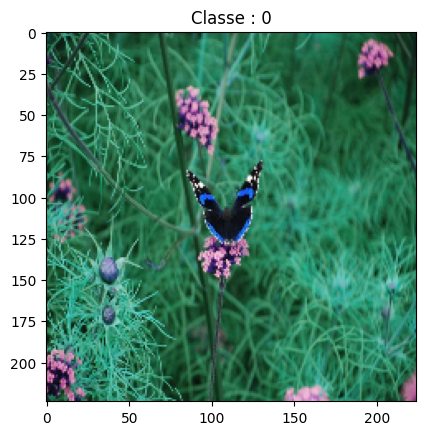

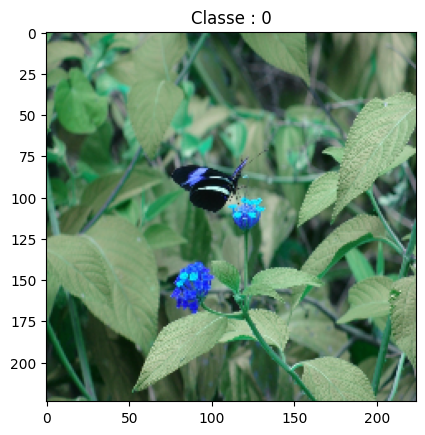

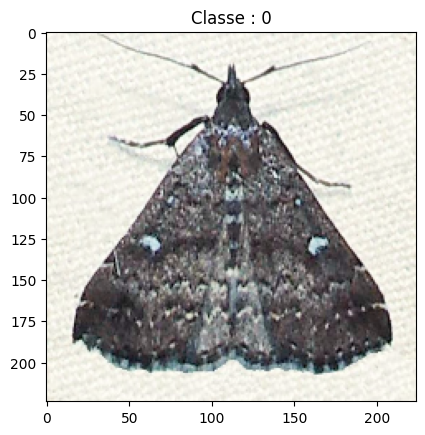

In [ ]:
for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Classe : {Y[i]}")
    plt.show()

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Conversion des labels en catégories one-hot
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)

In [ ]:
history = model.fit(X, Y_one_hot, epochs=20, validation_data=(X_valid, Y_valid_one_hot))


Epoch 1/20


I0000 00:00:1706887460.288144      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


476/476 [==============================] - 66s 121ms/step - loss: 0.7460 - accuracy: 0.7820 - val_loss: 0.4853 - val_accuracy: 0.8526
Epoch 2/20
476/476 [==============================] - 54s 114ms/step - loss: 0.4126 - accuracy: 0.8656 - val_loss: 0.4392 - val_accuracy: 0.8766
Epoch 3/20
476/476 [==============================] - 56s 118ms/step - loss: 0.3026 - accuracy: 0.8982 - val_loss: 0.4681 - val_accuracy: 0.8684
Epoch 4/20
476/476 [==============================] - 56s 117ms/step - loss: 0.2303 - accuracy: 0.9211 - val_loss: 0.5599 - val_accuracy: 0.8679
Epoch 5/20
476/476 [==============================] - 56s 117ms/step - loss: 0.1821 - accuracy: 0.9361 - val_loss: 0.5540 - val_accuracy: 0.8677
Epoch 6/20
476/476 [==============================] - 56s 117ms/step - loss: 0.1570 - accuracy: 0.9417 - val_loss: 0.6151 - val_accuracy: 0.8814
Epoch 7/20
476/476 [==============================] - 56s 117ms/step - loss: 0.1448 - accuracy: 0.9452 - val_loss: 0.5963 - val_accuracy: 0.8

In [ ]:
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)

123/123 [==============================] - 12s 91ms/step


In [ ]:
conf_matrix = confusion_matrix(Y_valid, Y_pred_classes)
acc_score = accuracy_score(Y_valid, Y_pred_classes)
print("Score de précision:", acc_score)

Score de précision: 0.8735339112697603


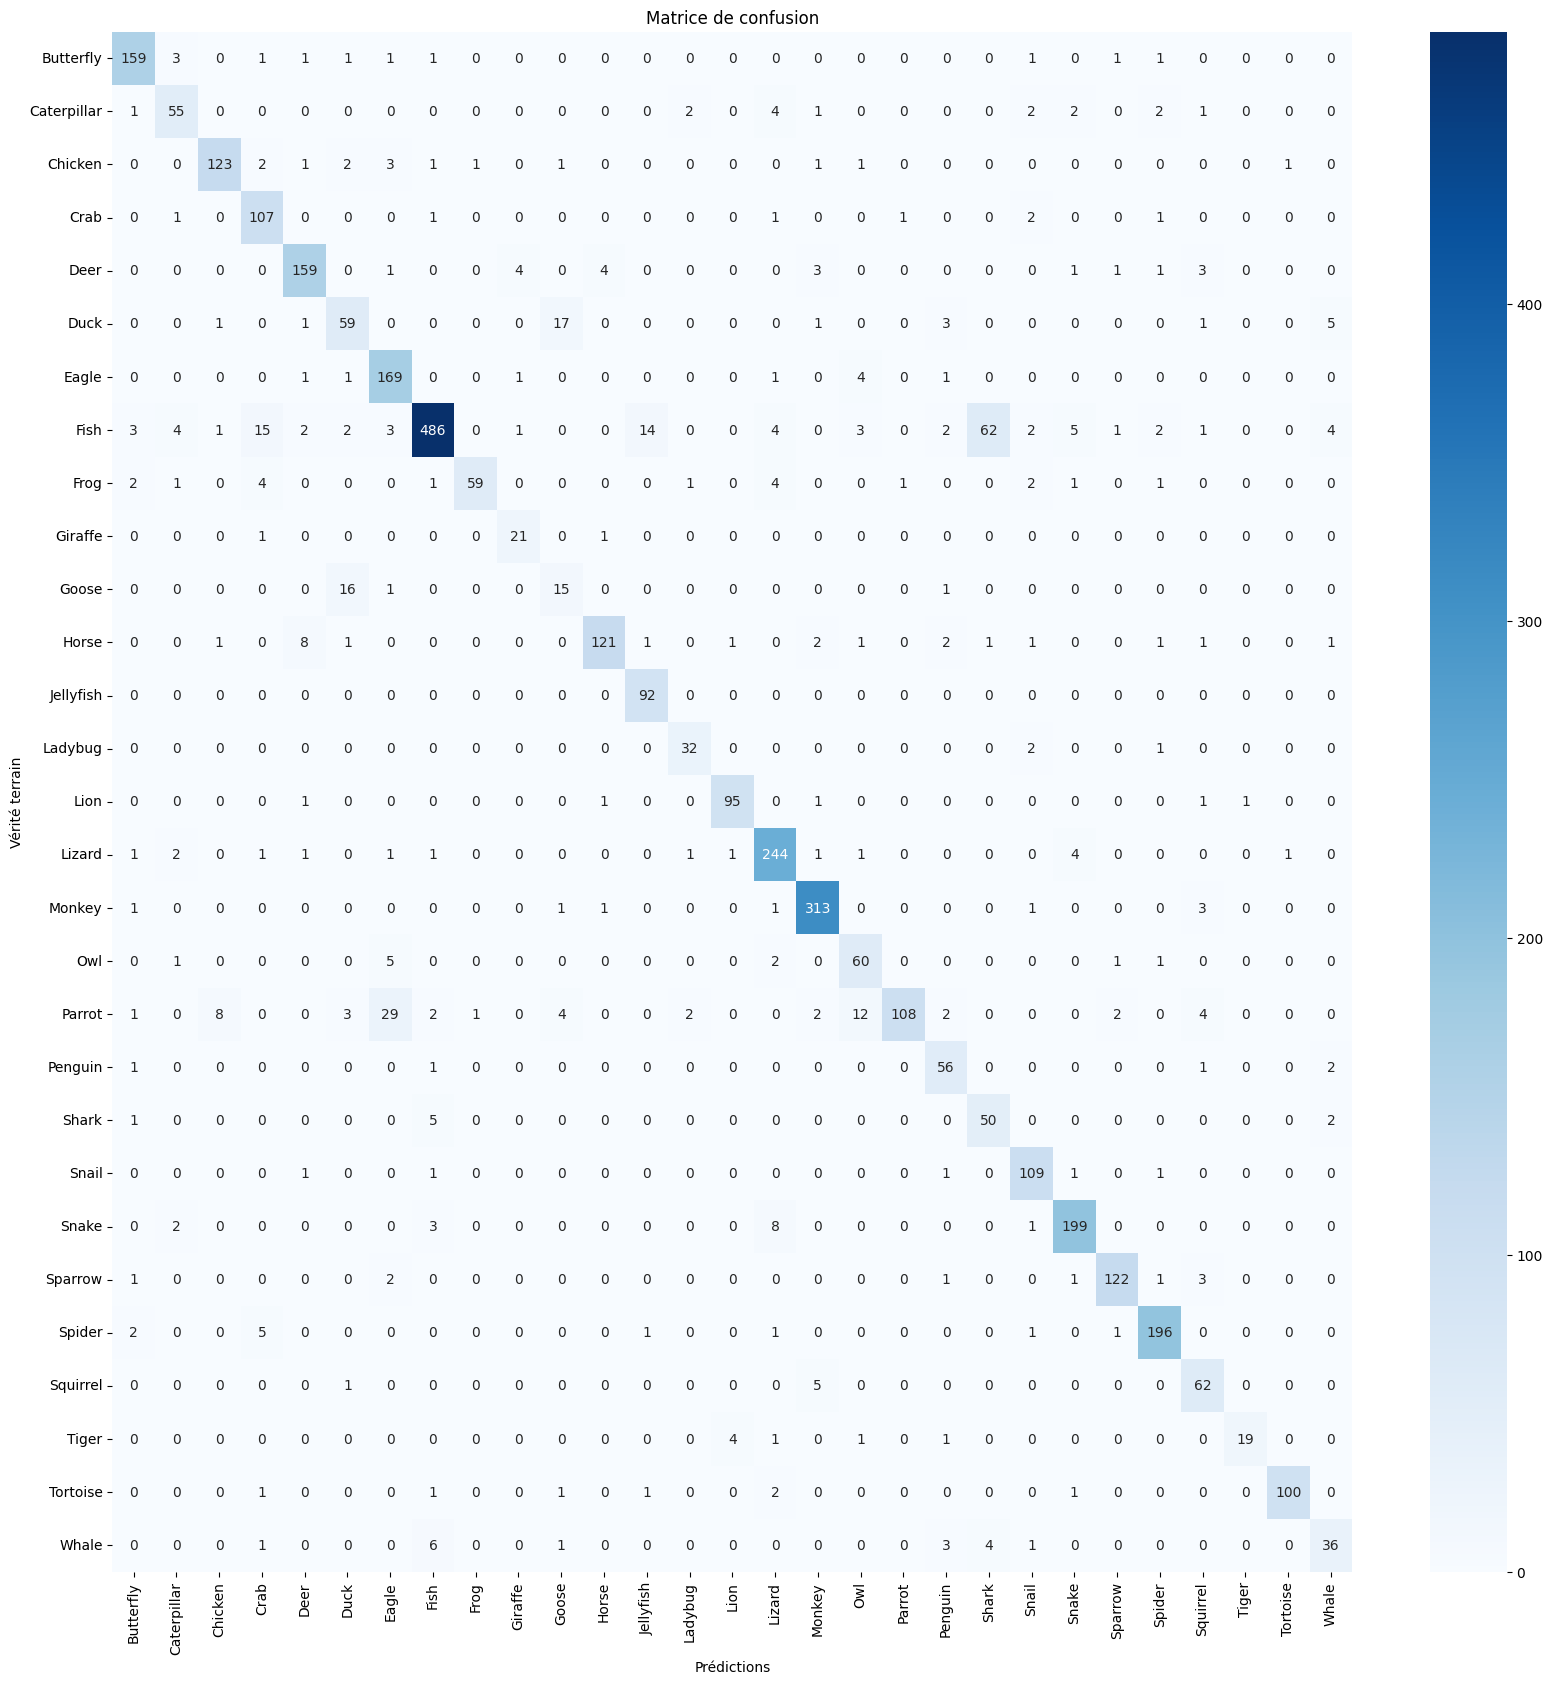

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.show()

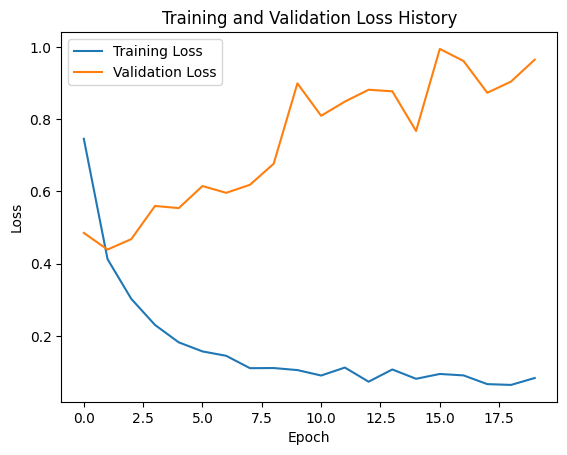

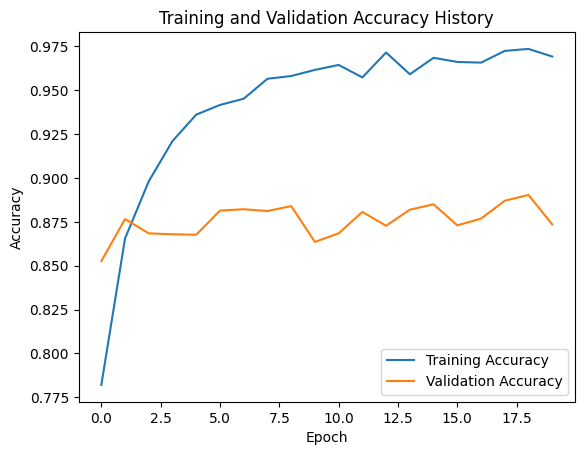

In [ ]:
# Affichage de l'historique de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Affichage de l'historique de précision
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
report = classification_report(Y_valid, Y_pred_classes, target_names=labels)
print(report)

              precision    recall  f1-score   support

   Butterfly       0.92      0.94      0.93       170
 Caterpillar       0.80      0.79      0.79        70
     Chicken       0.92      0.90      0.91       137
        Crab       0.78      0.94      0.85       114
        Deer       0.90      0.90      0.90       177
        Duck       0.69      0.67      0.68        88
       Eagle       0.79      0.95      0.86       178
        Fish       0.95      0.79      0.86       617
        Frog       0.97      0.77      0.86        77
     Giraffe       0.78      0.91      0.84        23
       Goose       0.38      0.45      0.41        33
       Horse       0.95      0.85      0.89       143
   Jellyfish       0.84      1.00      0.92        92
     Ladybug       0.84      0.91      0.88        35
        Lion       0.94      0.95      0.95       100
      Lizard       0.89      0.94      0.92       260
      Monkey       0.95      0.98      0.96       321
         Owl       0.72    

In [ ]:
model.save('ResNet50_DEL.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
# set the file path to the pre-trained model
model_file_path = '/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/ResNet50_DEL.h5'

# load the pre-trained model
loaded_model = tf.keras.models.load_model(model_file_path)

# print a summary of the model's architecture
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
loaded_model.evaluate(valid_data)